
# Punto 2 — EDA Funcional de Ventas (100 tiendas × 24 meses)

**Objetivo:** Explorar la estructura, calidad y patrones de las series mensuales de ventas para 100 tiendas durante 24 meses, preparando la base para una **clusterización funcional** y la posterior **estimación de la curva de la Tienda_101**.

**Archivos base:**
- `/mnt/data/Punto2.ventas_funcionales.csv` (crudo)
- `data/clean/ventas_funcionales_clean.csv` (copia estándar; *no se requirió limpieza*)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
df = pd.read_csv("../data/raw/Punto2.ventas_funcionales.csv")
df.head()


,Periodo,Tienda_1,Tienda_2,Tienda_3,Tienda_4,Tienda_5,Tienda_6,Tienda_7,Tienda_8,Tienda_9,...,Tienda_91,Tienda_92,Tienda_93,Tienda_94,Tienda_95,Tienda_96,Tienda_97,Tienda_98,Tienda_99,Tienda_100
0,1,371.56,447.25,828.31,211.31,989.85,"1,130.51",587.35,193.13,903.74,...,558.98,588.05,931.26,475.00,919.62,525.94,729.53,"1,383.45","3,607.81",771.14
1,2,522.07,530.93,904.22,221.84,"1,062.30","1,191.00",607.17,210.44,"1,138.63",...,625.64,785.93,954.06,427.60,980.16,606.15,891.86,"1,388.16","3,677.75",784.57
2,3,521.88,678.06,"1,089.59",241.28,"1,066.98","1,184.48",643.09,230.03,999.55,...,896.02,716.27,"1,059.19",562.63,"1,095.07",662.40,"1,089.25","1,661.04","4,408.70",816.53
3,4,538.89,689.72,"1,255.47",264.90,"1,293.89","1,421.94",700.39,246.32,"1,187.08",...,861.39,739.36,983.87,592.41,"1,184.19",888.08,"1,130.57","1,895.52","4,207.44",987.68
4,5,679.22,682.21,"1,189.66",288.75,"1,257.50","1,456.08",750.27,319.29,"1,672.46",...,850.36,951.99,"1,298.92",680.05,"1,225.02",760.20,"1,374.23","1,711.62","4,734.34",847.61


## 1. Estructura e Información General

In [2]:

print("Shape:", df.shape)
display(df.dtypes.to_frame("dtype").T)
display(df.describe().T.head())


Shape: (24, 101)


,Periodo,Tienda_1,Tienda_2,Tienda_3,Tienda_4,Tienda_5,Tienda_6,Tienda_7,Tienda_8,Tienda_9,...,Tienda_91,Tienda_92,Tienda_93,Tienda_94,Tienda_95,Tienda_96,Tienda_97,Tienda_98,Tienda_99,Tienda_100
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


,count,mean,std,min,25%,50%,75%,max
Periodo,24.00,12.50,7.07,1.00,6.75,12.50,18.25,24.00
Tienda_1,24.00,"1,172.07",449.28,371.56,815.38,"1,183.86","1,495.16","1,969.64"
Tienda_2,24.00,"1,082.10",346.90,447.25,789.29,"1,074.20","1,309.13","1,629.75"
Tienda_3,24.00,"1,923.15",617.19,828.31,"1,474.64","2,024.17","2,402.92","3,157.33"
Tienda_4,24.00,376.28,99.34,211.31,306.11,366.77,463.06,527.41


## 2. Calidad de Datos

In [3]:

quality = {}
quality["total_nulls"] = int(df.isna().sum().sum())
quality["cols_with_null"] = int((df.isna().sum()>0).sum())
quality["total_negatives"] = int((df.drop(columns=["Periodo"])<0).sum().sum())
quality["total_zeros"] = int((df.drop(columns=["Periodo"])==0).sum().sum())
quality["period_is_sequential"] = bool((df["Periodo"].diff().dropna()==1).all())
quality


{'total_nulls': 0,
 'cols_with_null': 0,
 'total_negatives': 0,
 'total_zeros': 0,
 'period_is_sequential': True}


**Conclusión de calidad:** No se encontraron valores nulos, negativos ni ceros; los periodos están correctamente secuenciales. **No se requiere limpieza.** Se genera una copia estándar en `data/clean/ventas_funcionales_clean.csv` para trazabilidad.


## 3. Estadísticas Descriptivas por Tienda

In [4]:

stats = df.drop(columns=["Periodo"]).describe().T
stats["cv"] = stats["std"] / stats["mean"]
stats.sort_values("mean", ascending=False).head(10)


,count,mean,std,min,25%,50%,75%,max,cv
Tienda_43,24.00,"7,167.92","2,512.06","3,201.32","5,182.55","7,264.35","9,021.71","10,946.01",0.35
Tienda_99,24.00,"6,210.01","1,534.66","3,607.81","5,053.59","6,243.93","7,683.41","8,487.97",0.25
Tienda_41,24.00,"4,598.70","1,202.41","2,653.37","3,603.73","4,685.48","5,395.29","6,778.57",0.26
Tienda_44,24.00,"4,043.65","1,425.70","1,853.47","2,973.87","3,867.31","5,327.46","6,602.17",0.35
Tienda_35,24.00,"3,389.75",938.46,"1,941.14","2,566.37","3,485.06","4,123.92","5,023.90",0.28
Tienda_49,24.00,"3,300.06","1,184.32","1,559.98","2,243.61","3,086.04","4,446.37","5,195.68",0.36
Tienda_85,24.00,"3,230.57","1,355.83","1,104.05","2,059.64","3,154.90","4,378.79","5,558.74",0.42
Tienda_10,24.00,"2,935.40","1,263.71",973.51,"1,936.57","2,992.19","3,901.89","4,942.47",0.43
Tienda_98,24.00,"2,893.52",946.51,"1,383.45","2,172.80","2,943.70","3,624.47","4,540.23",0.33
Tienda_74,24.00,"2,884.11","1,195.40",957.21,"1,988.02","2,954.68","3,661.55","5,611.35",0.41


In [5]:

# Top 10 por variabilidad (desviación estándar)
stats.sort_values("std", ascending=False).head(20)


,count,mean,std,min,25%,50%,75%,max,cv
Tienda_43,24.00,"7,167.92","2,512.06","3,201.32","5,182.55","7,264.35","9,021.71","10,946.01",0.35
Tienda_99,24.00,"6,210.01","1,534.66","3,607.81","5,053.59","6,243.93","7,683.41","8,487.97",0.25
Tienda_44,24.00,"4,043.65","1,425.70","1,853.47","2,973.87","3,867.31","5,327.46","6,602.17",0.35
Tienda_85,24.00,"3,230.57","1,355.83","1,104.05","2,059.64","3,154.90","4,378.79","5,558.74",0.42
Tienda_10,24.00,"2,935.40","1,263.71",973.51,"1,936.57","2,992.19","3,901.89","4,942.47",0.43
Tienda_41,24.00,"4,598.70","1,202.41","2,653.37","3,603.73","4,685.48","5,395.29","6,778.57",0.26
Tienda_74,24.00,"2,884.11","1,195.40",957.21,"1,988.02","2,954.68","3,661.55","5,611.35",0.41
Tienda_49,24.00,"3,300.06","1,184.32","1,559.98","2,243.61","3,086.04","4,446.37","5,195.68",0.36
Tienda_30,24.00,"2,737.57","1,140.94",906.07,"1,893.44","2,624.47","3,566.17","4,815.51",0.42
Tienda_26,24.00,"2,458.87","1,058.67",668.23,"1,562.71","2,663.57","3,078.63","4,168.06",0.43


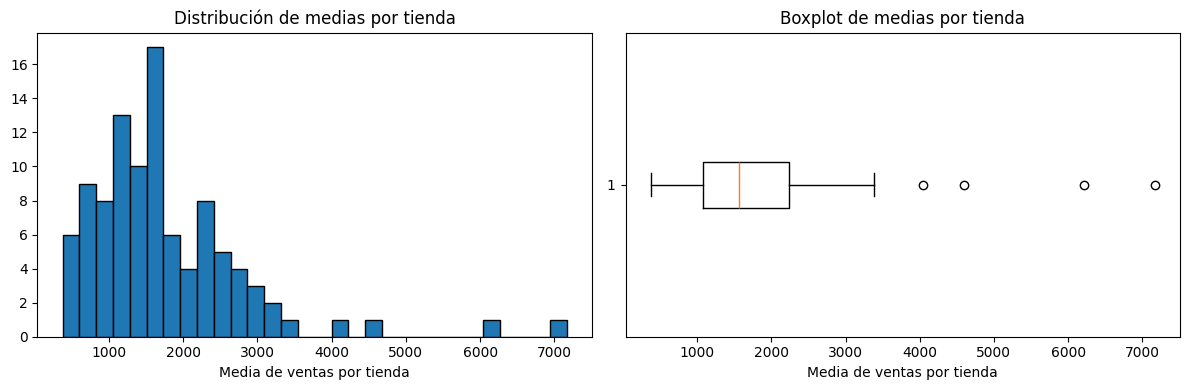

In [6]:
# Distribución de medias (histograma y boxplot)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axs[0].hist(stats["mean"], bins=30, edgecolor="black")
axs[0].set_title("Distribución de medias por tienda")
axs[0].set_xlabel("Media de ventas por tienda")

# Boxplot
axs[1].boxplot(stats["mean"], vert=False)
axs[1].set_title("Boxplot de medias por tienda")
axs[1].set_xlabel("Media de ventas por tienda")

plt.tight_layout()
plt.show()


### Análisis de resultados iniciales sobre estadisticas descriptivas

- **Distribución de medias por tienda**: la mayoría cae entre ~1.000 y 2.500; hay cola derecha marcada con pocas tiendas muy grandes (Tienda_43 ~7.168, Tienda_99 ~6.210, Tienda_41 ~4.599, Tienda_44 ~4.044). El boxplot muestra una mediana alrededor de ~1.6–1.8k y varios outliers a la derecha.
- Al igual que el EDA del punto 1, nos encontramos con **Outliers** (posiblemente estructurales si tienen relacion): las mismas (43, 99, 41, 44) aparecen como atípicas por nivel y por dispersión.
- Veo una variablidad **moderada o alta** esto lo exploraremos más adelante, es normal si hablamos de que pueden haber estacionalidades.

Asi viendo esto se puede sugerir 3-4 clusteres de primer vistazo. Los comportamientos **normales**, los comportamientos un poco **medios-altos** y podriamos ver comportamientos **hiper**.

## 4. Distribución Global e Outliers Estructurales

In [7]:

all_sales = df.drop(columns=["Periodo"]).values.flatten()
pd.Series(all_sales).describe()


count    2,400.00
mean     1,755.62
std      1,258.33
min        107.41
25%        932.99
50%      1,466.88
75%      2,212.44
max     10,946.01
dtype: float64

No distinguimos por ahora entre tiendas individuales

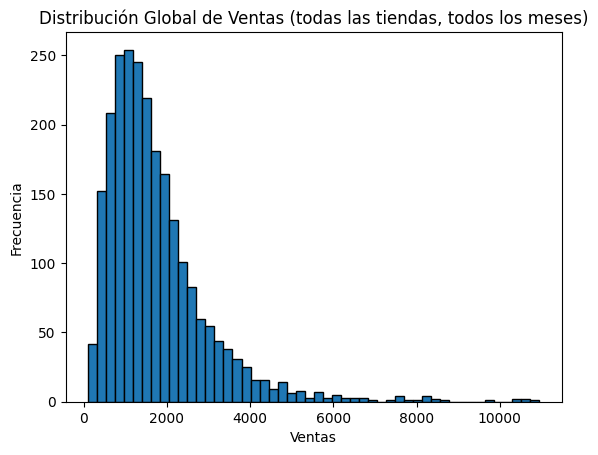

In [8]:

plt.hist(all_sales, bins=50, edgecolor="black")
plt.title("Distribución Global de Ventas (todas las tiendas, todos los meses)")
plt.xlabel("Ventas"); plt.ylabel("Frecuencia"); plt.show()


In [9]:

# Detectar outliers por media usando umbral robusto
mu_means = stats["mean"].mean()
sd_means = stats["mean"].std()
outlier_shops = stats[stats["mean"] > mu_means + 2*sd_means].index.tolist()
outlier_shops


['Tienda_41', 'Tienda_43', 'Tienda_44', 'Tienda_99']

**Tiendas outlier por magnitud** (Estas son las tiendas que encontramos como hyper o altas). Podrian considerarse como **segmento aparte** o manejarse con métricas de similitud robustas en el clustering.


## 5. Tendencias Temporales Globales

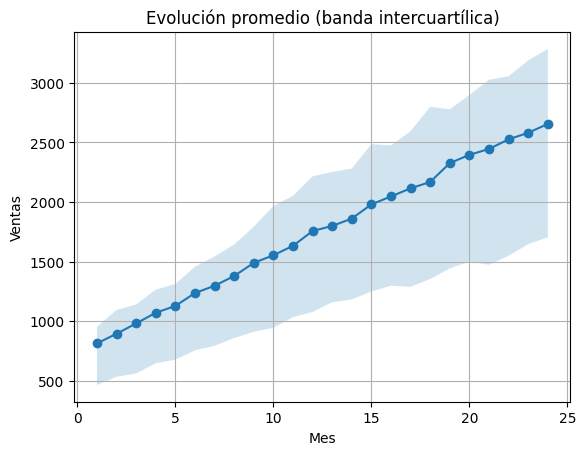

In [10]:

series_mean = df.drop(columns=["Periodo"]).mean(axis=1)
series_q25 = df.drop(columns=["Periodo"]).quantile(0.25, axis=1)
series_q75 = df.drop(columns=["Periodo"]).quantile(0.75, axis=1)

plt.plot(df["Periodo"], series_mean, marker="o")
plt.fill_between(df["Periodo"], series_q25, series_q75, alpha=0.2)
plt.title("Evolución promedio (banda intercuartílica)")
plt.xlabel("Mes"); plt.ylabel("Ventas"); plt.grid(True); plt.show()


Continuamos sin distiguir por tiendas, para revisar el comportamiento de las tiendas. ¿Que podemos notas acar?

- La **curva** promedio es **creciente**: en general, las tiendas aumentan sus ventas con el tiempo.
- La **banda intercuartílica** se va ensanchando con el tiempo: aEn los primeros meses (mes 1–5) hay menos dispersión entre tiendas, pero cuando la tienda ya tiene una cierta madurez en el mes 20–24 la brecha entre las más bajas (Q25) y las más altas (Q75) es mucho mayor.

No parece que vaya a existir un cluster con tendencia negativa.

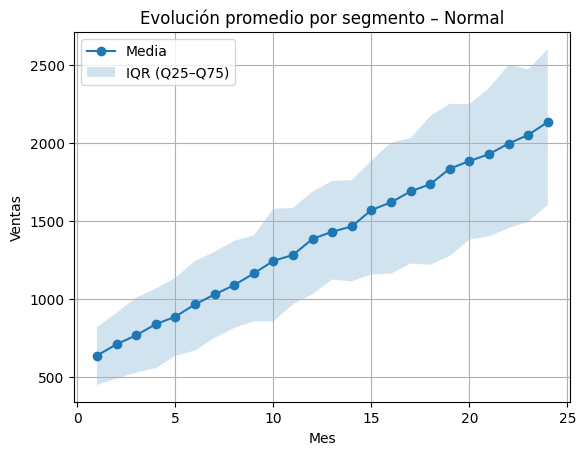

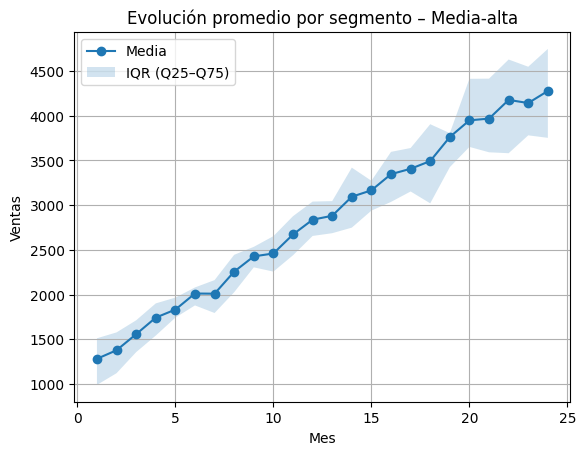

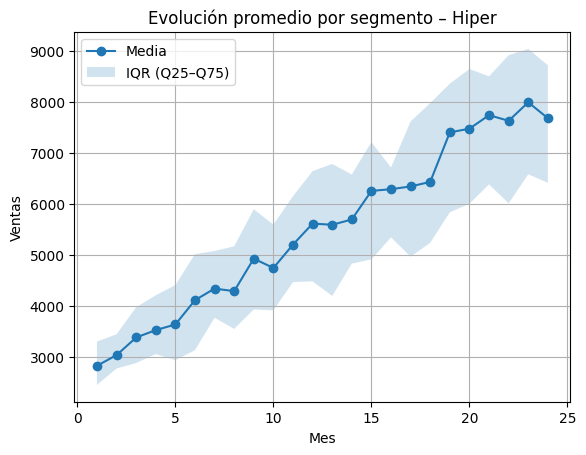

In [16]:
# --- 2) Clasificación heurística por magnitud (media por tienda) ---
#    Normal      : media <= 2500
#    Media-alta  : 2500 < media <= 4000
#    Hiper       : media  > 4000
tiendas = [c for c in df.columns if c != "Periodo"]
medias_por_tienda = df[tiendas].mean()

segmento = {}
for t in tiendas:
    m = medias_por_tienda[t]
    if m <= 2500:
        segmento[t] = "Normal"
    elif m <= 4000:
        segmento[t] = "Media-alta"
    else:
        segmento[t] = "Hiper"

# --- 3) Función para graficar media + banda IQR por segmento ---
def plot_segmento(df, tiendas_segmento, titulo):
    if len(tiendas_segmento) == 0:
        print(f"No hay tiendas en el segmento: {titulo}")
        return
    sub = df[["Periodo"] + tiendas_segmento].copy()
    series_mean = sub[tiendas_segmento].mean(axis=1)
    series_q25  = sub[tiendas_segmento].quantile(0.25, axis=1)
    series_q75  = sub[tiendas_segmento].quantile(0.75, axis=1)

    plt.plot(sub["Periodo"], series_mean, marker="o", label="Media")
    plt.fill_between(sub["Periodo"], series_q25, series_q75, alpha=0.2, label="IQR (Q25–Q75)")
    plt.title(f"Evolución promedio por segmento – {titulo}")
    plt.xlabel("Mes"); plt.ylabel("Ventas"); plt.grid(True)
    plt.legend()
    plt.show()

# --- 4) Listas de tiendas por segmento ---
tiendas_normal     = [t for t,s in segmento.items() if s == "Normal"]
tiendas_media_alta = [t for t,s in segmento.items() if s == "Media-alta"]
tiendas_hiper      = [t for t,s in segmento.items() if s == "Hiper"]

# --- 5) Gráficas (una por segmento) ---
plot_segmento(df, tiendas_normal,     "Normal")
plot_segmento(df, tiendas_media_alta, "Media-alta")
plot_segmento(df, tiendas_hiper,      "Hiper")



### Análisis de los tamaños

Tenmos 3 tamaños inicialmente, vamos a agrupar medio-alto.

- **Segmento normal:** Notamos que comienzan en 600-700 y llega aproximadamente a 2100 ventas en el mes 24, con una **banda intercuartilica estrecha**, se comportan de manera "tipica" todas creciendo de manera **homogenea**.
- **Segmento media-alta** Arrancan con aproximadamente 1200-1300 ventas llegando a aproximadamente a 4200 ventas, con una banda más estrecha que el grupo anterior, pero no se abre tanto en el tiempo, es decir que igualmente son **consistentes en su forma de crecimeiento**
- **Segmento Hyper** los outlayesr inician con ventas MUY altas de aproximadamente 3000 ventas llegando al mes 24 con ventas entre 8000-9000 aproximadamente. La banda inicia estrecha, pero empieza a ampliarse, sin embargo vemos que el estrechamiento empieza a variar mucho teniendo **grandes diferencias de magnitud**.

## 6. Crecimientos y Forma de Curvas

Empezaremos a revisar el comportamiento individual de las tiendas.

In [11]:

# Crecimiento porcentual promedio por tienda
growth = df.drop(columns=["Periodo"]).pct_change().mean()
growth.sort_values(ascending=False).head(10)


Tienda_55   0.11
Tienda_26   0.10
Tienda_68   0.09
Tienda_74   0.09
Tienda_76   0.09
Tienda_62   0.09
Tienda_61   0.09
Tienda_25   0.09
Tienda_57   0.09
Tienda_33   0.09
dtype: float64

Revisamos el **crecimiento relativo** encontrando que la tienda 55 acelera fuerte. Esto nos muestr aposibles tiendas emergentes, es decir que aunque aun no es un **hipermercado** lo podria llegar a ser.

In [12]:

# Correlación 'mes vs ventas' por tienda como proxy de tendencia
t = df["Periodo"].values
corrs = {}
for col in df.columns:
    if col=="Periodo": continue
    corrs[col] = np.corrcoef(t, df[col].values)[0,1]
corrs = pd.Series(corrs).sort_values(ascending=False)
corrs.head(10), corrs.tail(10)


(Tienda_27   0.99
 Tienda_25   0.99
 Tienda_17   0.99
 Tienda_77   0.99
 Tienda_70   0.99
 Tienda_14   0.99
 Tienda_69   0.99
 Tienda_63   0.99
 Tienda_71   0.99
 Tienda_13   0.99
 dtype: float64,
 Tienda_42   0.96
 Tienda_23   0.96
 Tienda_9    0.95
 Tienda_52   0.95
 Tienda_44   0.95
 Tienda_21   0.95
 Tienda_55   0.95
 Tienda_72   0.95
 Tienda_74   0.94
 Tienda_76   0.94
 dtype: float64)

Revisamos la linealidad es respecto al tiempo donde notamos que la tienda **27 y 25** crecen practicamente estable en el tiempo. Los valores bajos **76 y 74** crecen pero tienen irregularidades.

Esto nos permite descubrir **tiendas emergentes** y **tiendas inestables**.

## 7. Magintud vs crecimeinto vs consistencia

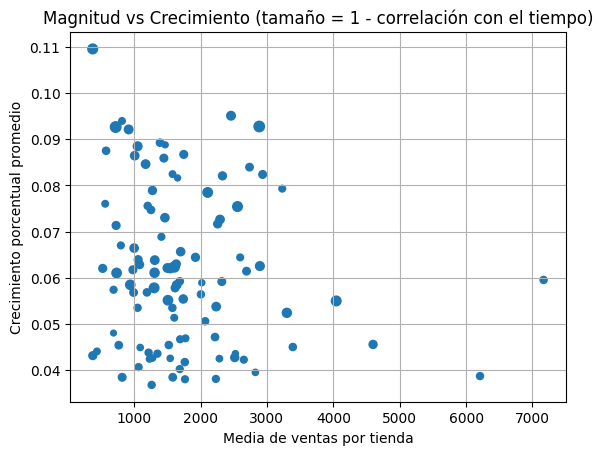

In [17]:
# --- Métricas por tienda ---
means   = df[tiendas].mean()                 # magnitud media
growth  = df[tiendas].pct_change().mean()    # crecimiento % promedio
t       = df["Periodo"].values
corrs   = pd.Series({c: np.corrcoef(t, df[c].values)[0,1] for c in tiendas})  # consistencia (linealidad) de la tendencia

# --- Scatter: X = magnitud, Y = crecimiento, tamaño = 1 - correlación (más grande = menos estable) ---
plt.scatter(means.values, growth.values, s=(1 - corrs.values) * 800 + 10)
plt.title("Magnitud vs Crecimiento (tamaño = 1 - correlación con el tiempo)")
plt.xlabel("Media de ventas por tienda")
plt.ylabel("Crecimiento porcentual promedio")
plt.grid(True)
plt.show()

Aca podemos mirar algo interesante. Entre más arriba esten los puntos son tiendas que **crecen más rapido**. Mientras más a la derecha **venden más**.

Tambien añadimos tamaño entre **más grande los puntos**, son menos estables en el tiempo. Realmente casi no hay diferencia con esto.

**NO HAY** una relación directa entre magnitud y crecimiento. Es decir que confirmamos que hay tiendas pequeñas pero con crecimientos altos y hay hipermercados que crecen lento.

Para el modelo, **TOCA COONSIDERAR** tanto la **forma** como el **nivel**. 

## 8. Curvas de Tiendas Outliers vs. Típicas

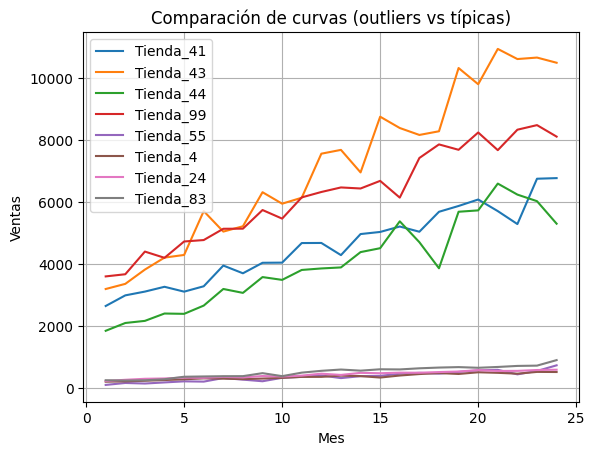

In [13]:

to_plot = (outlier_shops[:4] if len(outlier_shops)>=4 else outlier_shops) + stats.sort_values("mean").head(4).index.tolist()
for c in to_plot:
    plt.plot(df["Periodo"], df[c], label=c)
plt.title("Comparación de curvas (outliers vs típicas)")
plt.xlabel("Mes"); plt.ylabel("Ventas"); plt.legend(); plt.grid(True); plt.show()


Las hiper (41, 43, 44, 99) operan en otra escala de magnitud (hasta 10.000+), mientras que las típicas rondan los cientos.

En las típicas, las curvas son más homogéneas y cercanas al promedio, mientras que los hiper muestran mayor dispersión incluso entre ellos.

Tiendas seleccionadas:
- Típica_estable: Tienda_77 | media=2018.7 | growth=0.059 | corr=0.989
- Emergente: Tienda_55 | media=375.2 | growth=0.110 | corr=0.951
- Hiper_estable: Tienda_99 | media=6210.0 | growth=0.039 | corr=0.980
- Hiper_volátil: Tienda_44 | media=4043.6 | growth=0.055 | corr=0.952


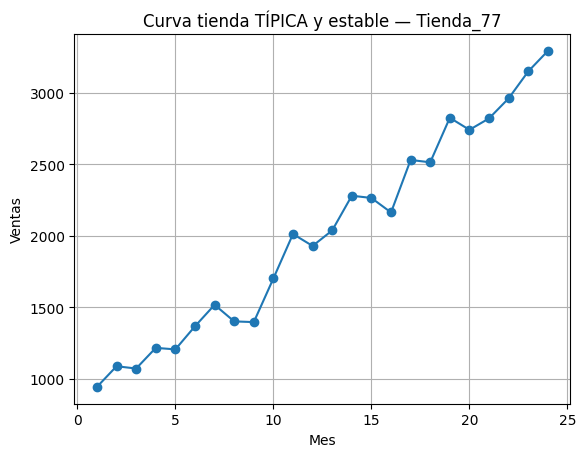

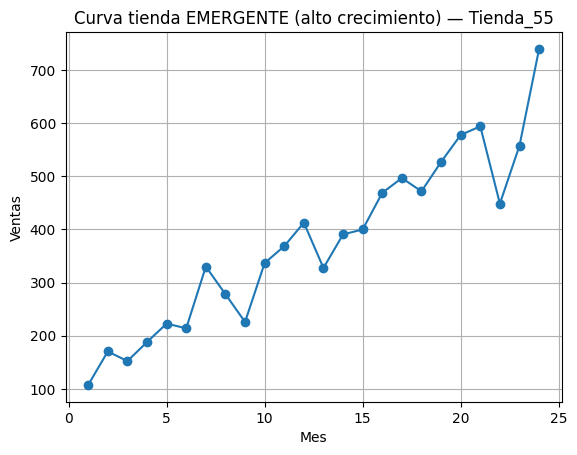

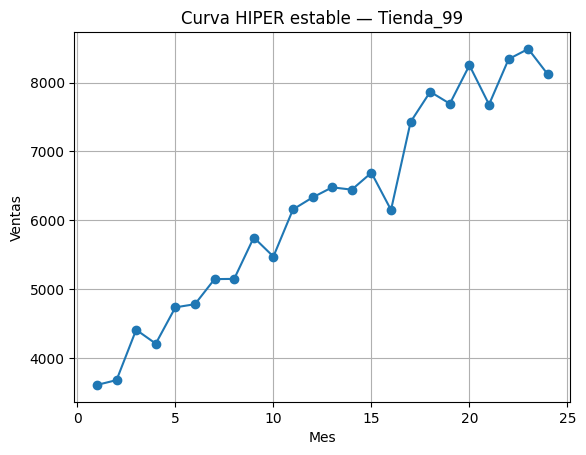

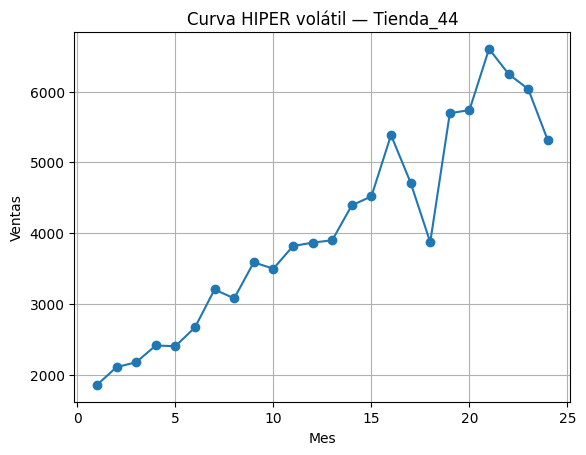

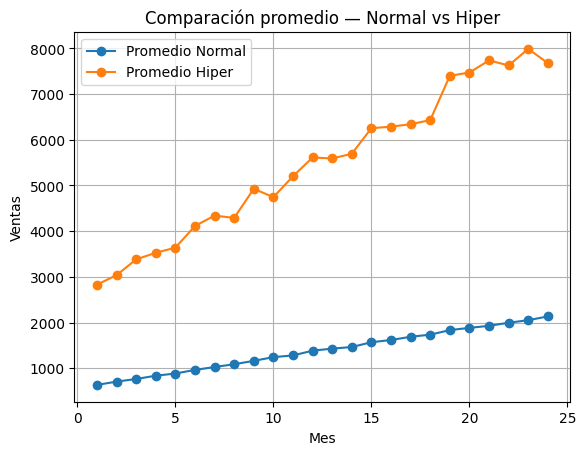

In [18]:
tiendas = [c for c in df.columns if c != "Periodo"]
means   = df[tiendas].mean()
growth  = df[tiendas].pct_change().mean()
t       = df["Periodo"].values
corrs   = pd.Series({c: np.corrcoef(t, df[c].values)[0,1] for c in tiendas})

# --- Segmentación por magnitud (heurística) ---
def segment(m):
    if m <= 2500:  return "Normal"
    elif m <= 4000: return "Media-alta"
    else:           return "Hiper"

segments = pd.Series({c: segment(means[c]) for c in tiendas})

# --- Selección de tiendas representativas ---
median_growth = growth.median()

# 1) típica: Normal, estable (corr>=p80) y crecimiento cercano a la mediana
cand_norm = [c for c in tiendas if segments[c]=="Normal" and corrs[c] >= corrs.quantile(0.8)]
typical = min(cand_norm, key=lambda c: abs(growth[c]-median_growth)) if cand_norm else means.idxmin()

# 2) emergente: Normal/Media-alta con mayor crecimiento
cand_emerg = [c for c in tiendas if segments[c] in ["Normal","Media-alta"]]
emergent = max(cand_emerg, key=lambda c: growth[c]) if cand_emerg else means.idxmax()

# 3) hiper estable: Hiper con mayor correlación
hipers = [c for c in tiendas if segments[c]=="Hiper"]
hyper_stable = max(hipers, key=lambda c: corrs[c]) if hipers else means.idxmax()

# 4) hiper volátil: Hiper con menor correlación
hyper_volatile = min(hipers, key=lambda c: corrs[c]) if hipers else means.idxmax()

seleccion = {
    "Típica_estable": typical,
    "Emergente": emergent,
    "Hiper_estable": hyper_stable,
    "Hiper_volátil": hyper_volatile
}

print("Tiendas seleccionadas:")
for k,v in seleccion.items():
    print(f"- {k}: {v} | media={means[v]:.1f} | growth={growth[v]:.3f} | corr={corrs[v]:.3f}")

# --- Función de ploteo de una curva individual ---
def plot_tienda(df, tienda, titulo):
    plt.plot(df["Periodo"], df[tienda], marker="o")
    plt.title(titulo)
    plt.xlabel("Mes"); plt.ylabel("Ventas"); plt.grid(True)
    plt.show()

# --- Graficar curvas individuales (una por gráfico) ---
plot_tienda(df, typical,        f"Curva tienda TÍPICA y estable — {typical}")
plot_tienda(df, emergent,       f"Curva tienda EMERGENTE (alto crecimiento) — {emergent}")
plot_tienda(df, hyper_stable,   f"Curva HIPER estable — {hyper_stable}")
plot_tienda(df, hyper_volatile, f"Curva HIPER volátil — {hyper_volatile}")

# --- Comparación promedio: Normal vs Hiper (dos líneas en un gráfico) ---
tiendas_normal = [c for c in tiendas if segments[c]=="Normal"]
tiendas_hiper  = [c for c in tiendas if segments[c]=="Hiper"]

mean_normal = df[tiendas_normal].mean(axis=1)
mean_hiper  = df[tiendas_hiper].mean(axis=1) if len(tiendas_hiper)>0 else None

plt.plot(df["Periodo"], mean_normal, marker="o", label="Promedio Normal")
if mean_hiper is not None:
    plt.plot(df["Periodo"], mean_hiper, marker="o", label="Promedio Hiper")
plt.title("Comparación promedio — Normal vs Hiper")
plt.xlabel("Mes"); plt.ylabel("Ventas"); plt.grid(True); plt.legend()
plt.show()

- **Tienda_77 (típica y estable):** crecimiento lineal, suave, consistente. Representa el “core business” normal.

- **Tienda_55 (emergente):** muy pequeña en magnitud, pero con crecimiento relativo alto (11% mensual) y cierta volatilidad. Caso de “tienda promesa” que escala rápido.

- **Tienda_99 (hiper estable):** ventas altísimas y trayectoria bastante lineal. Es un hipermercado consolidado.

- **Tienda_44 (hiper volátil):** nivel alto pero con saltos y caídas marcadas. Indica que no todos los hiper se comportan igual → algunos tienen estacionalidad o problemas de consistencia.

Entonces como el **gap** o la diferencia entre normales y hiper puede tener problemas de no mostrar los patrones.

Finalmente todo nos lleva a encontrar 3 patrones, las tiendas **normales** crecimiento suave pero escalable. El crecimiento de tiendas **emergentes** empiezan bajo pero con un crecimiento alto y los **hipermercados** empiezan alto pero son muy volatiles.


## 8. Preparación de Datos para Clusterización 


In [25]:
import os
import json

# --- 2) Carpeta destino ---
clean_dir = "../data/clean/punto2"
os.makedirs(clean_dir, exist_ok=True)

prefix = "Punto2."

# --- 3) Copia "clean" ---
df.to_csv(f"{clean_dir}/{prefix}ventas_funcionales_clean.csv", index=False)

# --- 4) Escalados por tienda ---
tiendas = [c for c in df.columns if c != "Periodo"]

# z-score
df_z = df.copy()
for c in tiendas:
  mu, sd = df[c].mean(), df[c].std(ddof=0)
  df_z[c] = (df[c] - mu) / (sd if sd != 0 else 1.0)
df_z.to_csv(f"{clean_dir}/{prefix}ventas_funcionales_zscore.csv", index=False)

# normalización por media
df_norm = df.copy()
for c in tiendas:
  mu = df[c].mean()
  df_norm[c] = df[c] / (mu if mu != 0 else 1.0)
df_norm.to_csv(f"{clean_dir}/{prefix}ventas_funcionales_normalized.csv", index=False)

# min-max 0–1
df_minmax = df.copy()
for c in tiendas:
  mn, mx = df[c].min(), df[c].max()
  rng = (mx - mn) if (mx - mn) != 0 else 1.0
  df_minmax[c] = (df[c] - mn) / rng
df_minmax.to_csv(f"{clean_dir}/{prefix}ventas_funcionales_minmax01.csv", index=False)

# --- 5) Métricas por tienda (metadata) ---
means   = df[tiendas].mean()
stds    = df[tiendas].std(ddof=0)
cv      = stds / means.replace(0, np.nan)
growth  = df[tiendas].pct_change().mean()
t       = df["Periodo"].values
corrs   = pd.Series({c: np.corrcoef(t, df[c].values)[0,1] for c in tiendas})

def segment(m):
  if m <= 2500:   return "Normal"
  elif m <= 4000: return "Media-alta"
  else:           return "Hiper"

segmento = pd.Series({c: segment(means[c]) for c in tiendas})

mu_means, sd_means = means.mean(), means.std()
is_outlier = means > mu_means + 2*sd_means

meta = pd.DataFrame({
  "tienda": tiendas,
  "media": means.values,
  "std": stds.values,
  "cv": cv.values,
  "growth_pct_mean": growth.values,
  "corr_time": corrs.values,
  "segment_magnitud": [segmento[c] for c in tiendas],
  "flag_outlier_magnitud": [bool(is_outlier[c]) for c in tiendas]
})
meta.to_csv(f"{clean_dir}/{prefix}ventas_funcionales_metadata_tienda.csv", index=False)

# --- 6) Selección de tiendas representativas (para reproducibilidad del informe) ---
median_growth = growth.median()
cand_norm = [c for c in tiendas if segmento[c]=="Normal" and corrs[c] >= corrs.quantile(0.8)]
typical = min(cand_norm, key=lambda c: abs(growth[c]-median_growth)) if cand_norm else means.idxmin()
cand_emerg = [c for c in tiendas if segmento[c] in ["Normal","Media-alta"]]
emergent = max(cand_emerg, key=lambda c: growth[c]) if cand_emerg else means.idxmax()
hipers = [c for c in tiendas if segmento[c]=="Hiper"]
hyper_stable  = max(hipers, key=lambda c: corrs[c]) if hipers else means.idxmax()
hyper_volatile = min(hipers, key=lambda c: corrs[c]) if hipers else means.idxmax()

with open(f"{clean_dir}/{prefix}ventas_funcionales_tiendas_representativas.json", "w") as f:
  json.dump({
    "tipica_estable": typical,
    "emergente": emergent,
    "hiper_estable": hyper_stable,
    "hiper_volatil": hyper_volatile
  }, f, ensure_ascii=False, indent=2)

# --- 7) Formato largo (tidy) ---
def wide_to_long(wide, value_name):
  rows = []
  for c in tiendas:
    for i, row in wide.iterrows():
      rows.append({"Periodo": int(row["Periodo"]), "Tienda": c, value_name: row[c]})
  return pd.DataFrame(rows)

wide_long = wide_to_long(df, "Ventas")
wide_long.to_csv(f"{clean_dir}/{prefix}ventas_funcionales_long.csv", index=False)

wide_long_z    = wide_to_long(df_z, "Ventas_zscore")
wide_long_norm = wide_to_long(df_norm, "Ventas_normalized")
wide_long_mm   = wide_to_long(df_minmax, "Ventas_minmax01")

wide_long_z.to_csv(f"{clean_dir}/{prefix}ventas_funcionales_long_zscore.csv", index=False)
wide_long_norm.to_csv(f"{clean_dir}/{prefix}ventas_funcionales_long_normalized.csv", index=False)
wide_long_mm.to_csv(f"{clean_dir}/{prefix}ventas_funcionales_long_minmax01.csv", index=False)

print("✅ Artefactos generados en:", os.path.abspath(clean_dir))

✅ Artefactos generados en: /home/thechieft/Documentos/ParcialDeFi4/data/clean/punto2


In [26]:
# Copiar la base de datos de /raw/Punto2.Ventas_Nuevo_Punto.csv y copiarla en ../data/clean

dir = "../data/raw"
df = pd.read_csv(f"{dir}/Punto2.Ventas_Nuevo_Punto.csv")
df.to_csv(f"{clean_dir}/{prefix}Ventas_Nuevo_Punto.csv", index=False)   
